# **Load Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [48]:
df = pd.read_csv('D:\Data Science\Portofolio\Data_Analysis_RFM\RFM_Analysis\Data\Online Shopping.csv')
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


1. CustomerID: ID unik untuk setiap pelanggan.
1. Gender: Jenis kelamin pelanggan (mis., Pria, Wanita).
1. Lokasi: Informasi lokasi atau alamat pelanggan.
1. TenureMonths: Jumlah bulan pelanggan telah terhubung dengan platform.
1. TransactionID: ID unik untuk setiap transaksi.
1. TransactionDate: Tanggal transaksi.
1. Product_SKU: Pengenal Stock Keeping Unit (SKU) untuk produk.
1. Product_Description: Deskripsi produk.
1. Category_Product: Kategori tempat produk berada.
1. Quantity: Kuantitas produk yang dibeli dalam transaksi.
1. Avg_Price: Harga rata-rata produk.
1. Delivery_Charges : Biaya yang terkait dengan pengiriman produk.
1. Cupon_Status: Status kupon yang terkait dengan transaksi.
1. GST: Pajak Barang dan Jasa yang terkait dengan transaksi.
1. Date: Tanggal transaksi (berpotensi redundan dengan Tanggal_Transaksi).
1. Offline_Spend: Jumlah yang dibelanjakan secara offline oleh pelanggan.
1. Online_Spend: Jumlah yang dibelanjakan secara online oleh pelanggan.
1. Month: Bulan terjadinya transaksi.
1. Coupon_Code: Kode yang terkait dengan kupon, jika ada.
1. Discount_pct: Persentase diskon yang diterapkan pada transaksi

# Data Cleaning

## Missing Value

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [54]:
df.isna().mean()

Unnamed: 0             0.000000
CustomerID             0.000585
Gender                 0.000585
Location               0.000585
Tenure_Months          0.000585
Transaction_ID         0.000585
Transaction_Date       0.000585
Product_SKU            0.000585
Product_Description    0.000585
Product_Category       0.000000
Quantity               0.000585
Avg_Price              0.000585
Delivery_Charges       0.000585
Coupon_Status          0.000585
GST                    0.000585
Date                   0.000585
Offline_Spend          0.000585
Online_Spend           0.000585
Month                  0.000000
Coupon_Code            0.007554
Discount_pct           0.007554
dtype: float64

In [55]:
df.dropna(inplace=True)

## Data Duplicates

In [56]:
df.duplicated().sum()

np.int64(0)

## Outlier

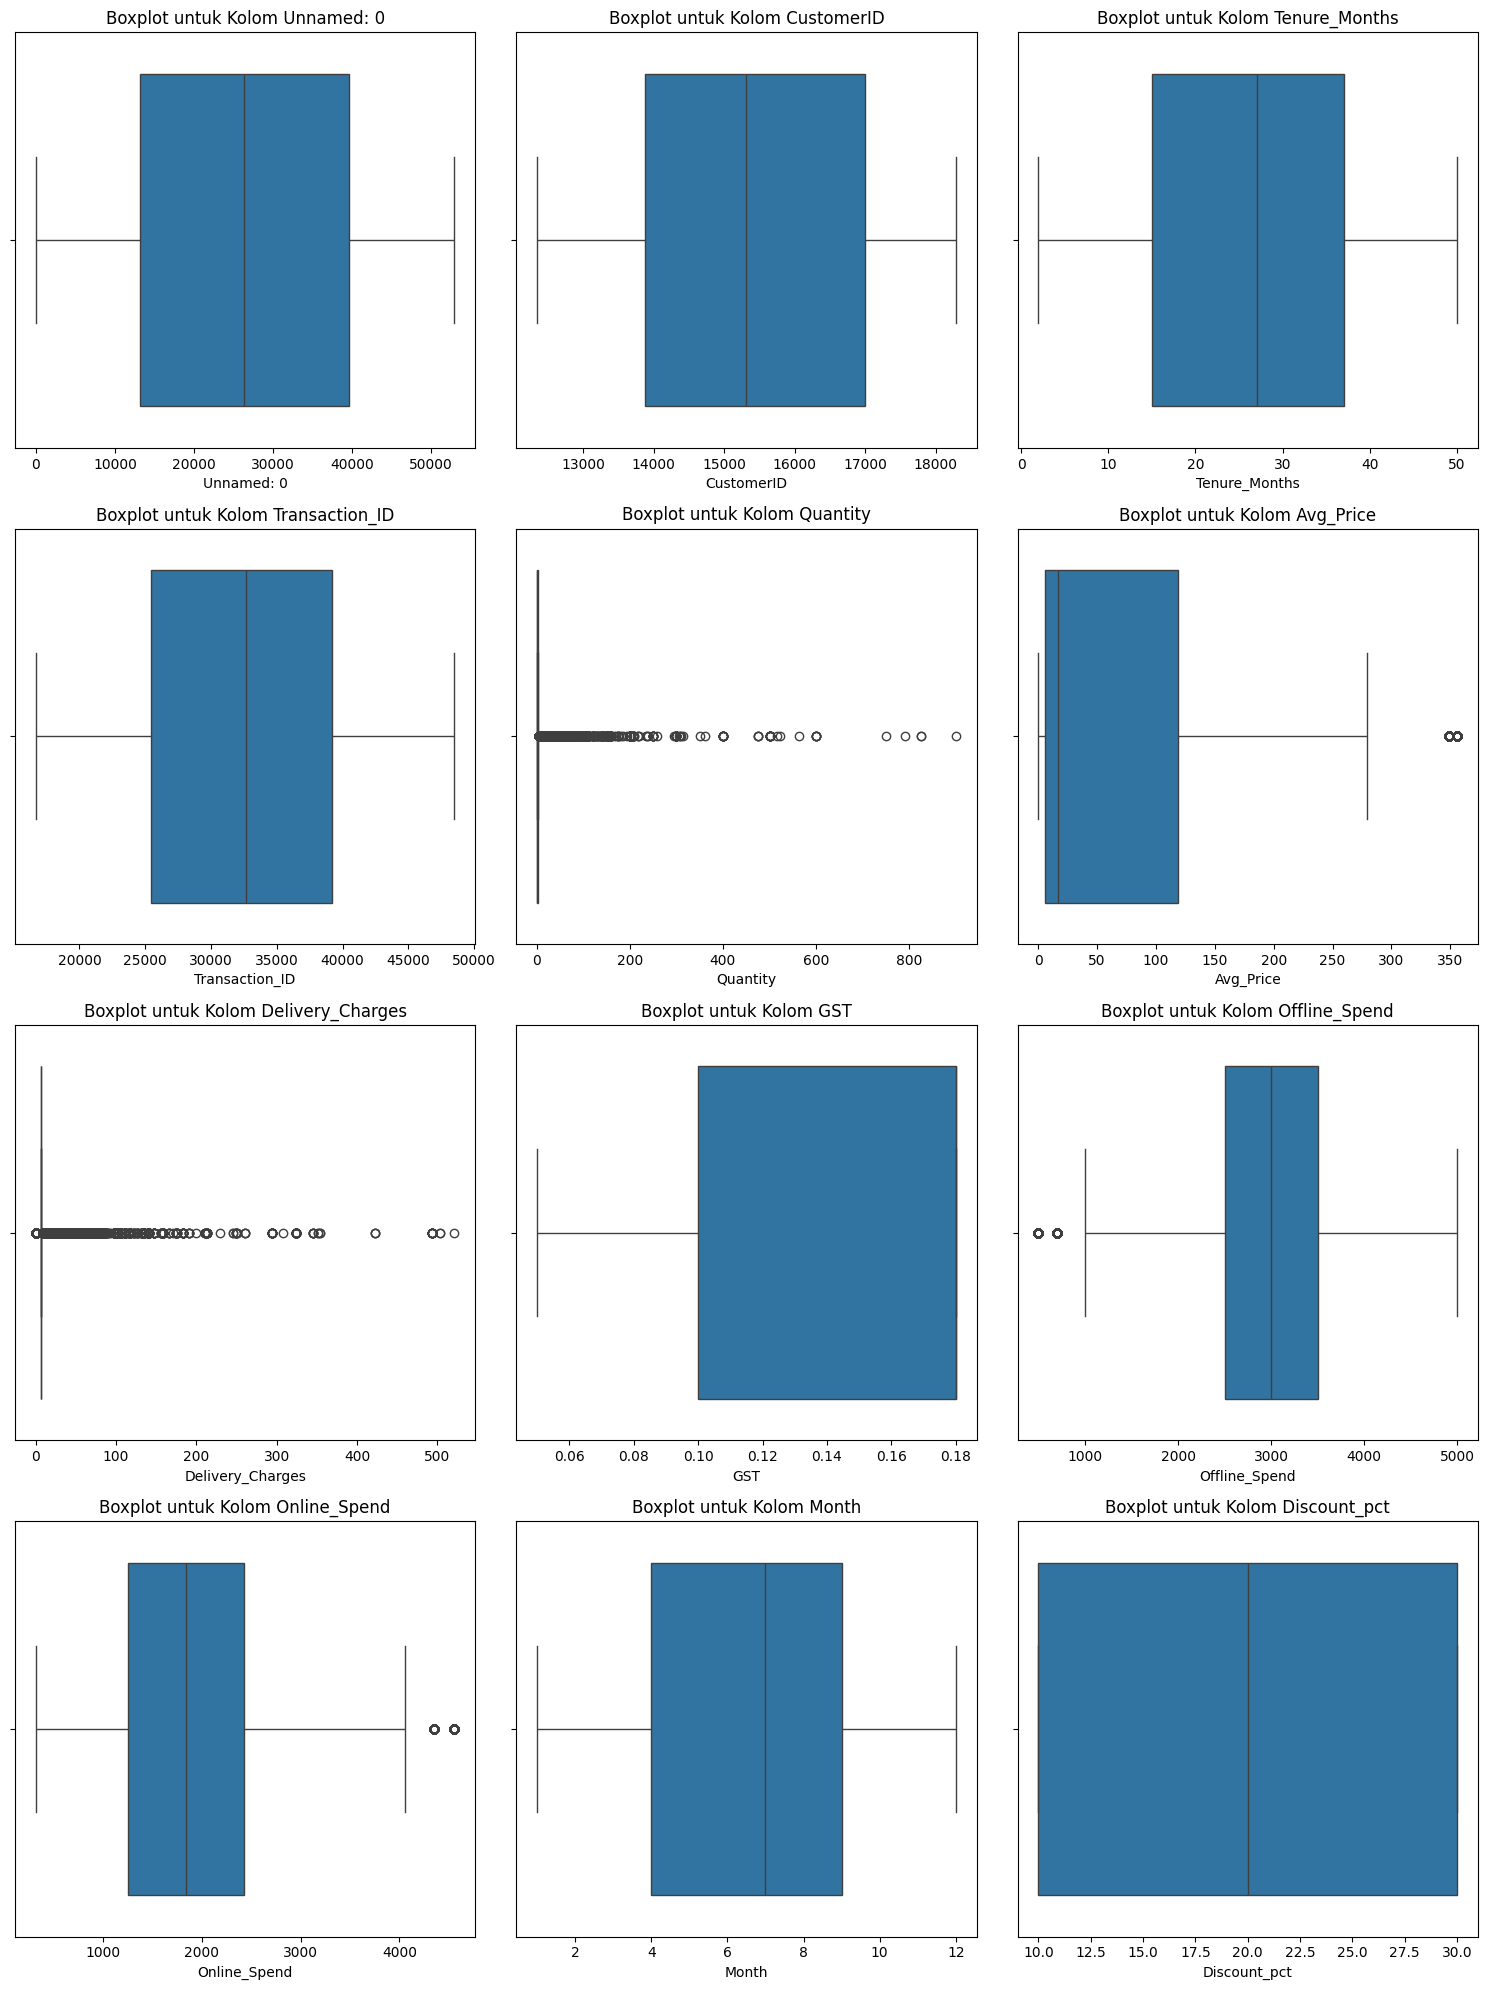

In [8]:
# Fungsi untuk membuat boxplot dalam subplot
def buat_boxplot_subplots(df, kolom_numerik):
    # Menentukan jumlah baris dan kolom untuk subplot
    n = len(kolom_numerik)
    baris = (n // 3) + (1 if n % 3 != 0 else 0)  # 3 subplot per baris

    # Membuat figure dan axes untuk subplot
    fig, axes = plt.subplots(baris, 3, figsize=(15, 5 * baris))
    axes = axes.flatten()  # Meratakan array axes untuk iterasi

    # Membuat boxplot untuk setiap kolom numerik
    for i, kolom in enumerate(kolom_numerik):
        sns.boxplot(x=df[kolom], ax=axes[i])
        axes[i].set_title(f"Boxplot untuk Kolom {kolom}")

    # Menyembunyikan axes yang tidak digunakan jika jumlah kolom tidak kelipatan 3
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Memberikan jarak antar subplot
    plt.tight_layout()
    plt.show()

# Mendapatkan list nama kolom numerik
kolom_numerik = df.select_dtypes(include=['number']).columns.tolist()

# Memanggil fungsi untuk membuat boxplot
buat_boxplot_subplots(df, kolom_numerik)

## Data Type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52524 non-null  int64  
 1   CustomerID           52524 non-null  float64
 2   Gender               52524 non-null  object 
 3   Location             52524 non-null  object 
 4   Tenure_Months        52524 non-null  float64
 5   Transaction_ID       52524 non-null  float64
 6   Transaction_Date     52524 non-null  object 
 7   Product_SKU          52524 non-null  object 
 8   Product_Description  52524 non-null  object 
 9   Product_Category     52524 non-null  object 
 10  Quantity             52524 non-null  float64
 11  Avg_Price            52524 non-null  float64
 12  Delivery_Charges     52524 non-null  float64
 13  Coupon_Status        52524 non-null  object 
 14  GST                  52524 non-null  float64
 15  Date                 52524 non-null  obje

In [10]:
df.drop(columns=['Unnamed: 0','Date'],axis=1,inplace=True)

In [11]:
df[['Transaction_ID','CustomerID']] = df[['Transaction_ID','CustomerID']].astype('object')
df['Transaction_Date']= pd.to_datetime(df['Transaction_Date'])

In [12]:
df[['Tenure_Months','Month','Quantity']] = df[['Tenure_Months','Month','Quantity']].astype('int64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  object        
 1   Gender               52524 non-null  object        
 2   Location             52524 non-null  object        
 3   Tenure_Months        52524 non-null  int64         
 4   Transaction_ID       52524 non-null  object        
 5   Transaction_Date     52524 non-null  datetime64[ns]
 6   Product_SKU          52524 non-null  object        
 7   Product_Description  52524 non-null  object        
 8   Product_Category     52524 non-null  object        
 9   Quantity             52524 non-null  int64         
 10  Avg_Price            52524 non-null  float64       
 11  Delivery_Charges     52524 non-null  float64       
 12  Coupon_Status        52524 non-null  object        
 13  GST                  52524 non-null 

# Data Exploration

## Segmentasi Pelanggan

### Lokasi

In [14]:
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,4500.0,2424.5,1,ELEC10,10.0
1,17850.0,M,Chicago,12,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,4500.0,2424.5,1,ELEC10,10.0
2,17850.0,M,Chicago,12,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1,4500.0,2424.5,1,ELEC10,10.0
3,17850.0,M,Chicago,12,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1,4500.0,2424.5,1,ELEC10,10.0
4,17850.0,M,Chicago,12,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1,4500.0,2424.5,1,ELEC10,10.0


In [15]:
df.groupby('Location').Tenure_Months.agg(['mean','median'])

,mean,median
Location,,
California,26.846202,28.0
Chicago,26.258224,27.0
New Jersey,25.974720,25.0
New York,24.797873,24.0
Washington DC,26.949059,29.0


## RFM Analysis

In [16]:
# Generate New Feature
df['Total_Spend'] = df['Offline_Spend'] + df['Online_Spend']

In [17]:
cut_off_date = df['Transaction_Date'].max()

rfm = df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (cut_off_date - x.max()).days,  # Recency
    'CustomerID': 'count',  # Frequency
    'Total_Spend': 'sum'  # Monetary
}).rename(columns={
    'Transaction_Date': 'Recency',
    'CustomerID': 'Frequency',
    'Total_Spend': 'Monetary'
}).reset_index()

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,107,2,11093.34
1,12347.0,59,59,243355.54
2,12348.0,73,23,121977.33
3,12350.0,17,17,126383.27
4,12356.0,107,36,199680.12


In [18]:
list1 = ['Recency','Frequency','Monetary']
for i in rfm[list1].columns:
    print(f"Mean ({i}) : {rfm[i].mean()}")
    print(f"Median ({i}) : {rfm[i].median()}")

Mean (Recency) : 144.29223433242507
Median (Recency) : 131.0
Mean (Frequency) : 35.77929155313352
Median (Frequency) : 21.0
Mean (Monetary) : 169116.0239100817
Median (Monetary) : 98691.65499999998


In [19]:
rfm['r_score'] = pd.qcut(rfm['Recency'], q = 5, labels = ['5','4','3','2','1'])
rfm['f_score'] = pd.qcut(rfm['Frequency'], q = 5, labels = ['1','2','3','4','5'])
rfm['m_score'] = pd.qcut(rfm['Monetary'], q = 5, labels = ['1','2','3','4','5'])

# Combine all scores
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score
0,12346.0,107,2,11093.34,3,1,1,31
1,12347.0,59,59,243355.54,4,5,4,45
2,12348.0,73,23,121977.33,4,3,3,43
3,12350.0,17,17,126383.27,5,3,3,53
4,12356.0,107,36,199680.12,3,4,4,34


In [20]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  1468 non-null   float64 
 1   Recency     1468 non-null   int64   
 2   Frequency   1468 non-null   int64   
 3   Monetary    1468 non-null   float64 
 4   r_score     1468 non-null   category
 5   f_score     1468 non-null   category
 6   m_score     1468 non-null   category
 7   rfm_score   1468 non-null   object  
dtypes: category(3), float64(2), int64(2), object(1)
memory usage: 62.4+ KB


Urutan Segment (r:f):
1. champions 5:5-4
1. loyal_customers 4-3:5-4
1. potential_loyalists 4-5:3-2
1. promising 4:1
1. cant_loose 2-1:5
1. at_risk 2-1:4-3
1. about_to_sleep 3:2-1
1. hibernating 2-1:2-1
1. need_attention 3:3




In [21]:
seg_map = {
r'[1-2][1-2]': 'hibernating',
r'[1-2][3-4]': 'at_risk',
r'[1-2]5': 'cant_lose',
r'3[1-2]': 'about_to_sleep',
r'33': 'need_attention',
r'[3-4][4-5]': 'loyal_customers',
r'41': 'promising',
r'51': 'new_customers',
r'[4-5][2-3]': 'potential_loyalists',
r'5[4-5]': 'champions'
    }

rfm['Segment'] = rfm['rfm_score'].replace(seg_map, regex=True)

In [22]:
pd.DataFrame(rfm.groupby('Segment')['CustomerID'].count().sort_values(ascending=False))

,CustomerID
Segment,
hibernating,308
loyal_customers,258
potential_loyalists,210
at_risk,202
champions,147
about_to_sleep,126
cant_lose,77
need_attention,53
promising,46


In [23]:
(rfm['Segment'].value_counts() / len(rfm)) * 100

Segment
hibernating            20.980926
loyal_customers        17.574932
potential_loyalists    14.305177
at_risk                13.760218
champions              10.013624
about_to_sleep          8.583106
cant_lose               5.245232
need_attention          3.610354
promising               3.133515
new_customers           2.792916
Name: count, dtype: float64

Text(0.5, 1.0, 'Number of transactions per month per gender')

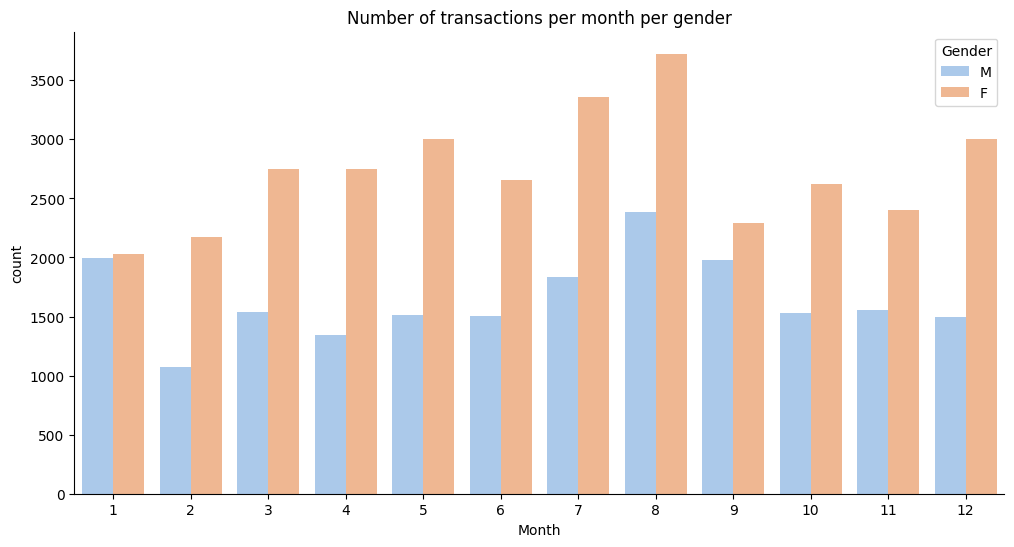

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x='Month', hue='Gender', palette='pastel')
sns.despine()
plt.title('Number of transactions per month per gender')

In [25]:
merged_df = df.merge(rfm,on='CustomerID')

merged_df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Discount_pct,Total_Spend,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score,Segment
0,17850.0,M,Chicago,12,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,10.0,6924.5,339,293,1166611.59,1,5,5,15,cant_lose
1,17850.0,M,Chicago,12,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,10.0,6924.5,339,293,1166611.59,1,5,5,15,cant_lose
2,17850.0,M,Chicago,12,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,...,10.0,6924.5,339,293,1166611.59,1,5,5,15,cant_lose
3,17850.0,M,Chicago,12,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,...,10.0,6924.5,339,293,1166611.59,1,5,5,15,cant_lose
4,17850.0,M,Chicago,12,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,10.0,6924.5,339,293,1166611.59,1,5,5,15,cant_lose


Text(0.5, 1.0, 'Number of transactions per month per segment')

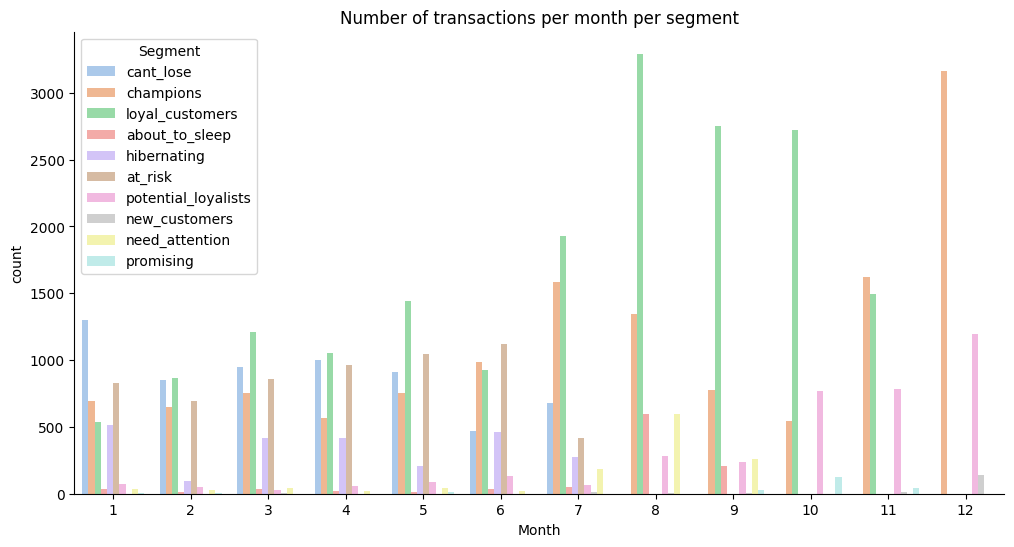

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(merged_df, x='Month', hue='Segment', palette='pastel')
sns.despine()
plt.title('Number of transactions per month per segment')

1. Siapa 5 pelanggan dengan kontribusi pembelian tertinggi

In [27]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52524 entries, 0 to 52523
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  object        
 1   Gender               52524 non-null  object        
 2   Location             52524 non-null  object        
 3   Tenure_Months        52524 non-null  int64         
 4   Transaction_ID       52524 non-null  object        
 5   Transaction_Date     52524 non-null  datetime64[ns]
 6   Product_SKU          52524 non-null  object        
 7   Product_Description  52524 non-null  object        
 8   Product_Category     52524 non-null  object        
 9   Quantity             52524 non-null  int64         
 10  Avg_Price            52524 non-null  float64       
 11  Delivery_Charges     52524 non-null  float64       
 12  Coupon_Status        52524 non-null  object        
 13  GST                  52524 non-

In [28]:
customer = merged_df[['CustomerID','Total_Spend','Location','Segment','r_score','f_score','m_score']]
customer.drop_duplicates(inplace=True)

In [29]:
customer = customer.sort_values(by=['Total_Spend'],ascending=False).reset_index(drop=True)

In [30]:
customer.head()

,CustomerID,Total_Spend,Location,Segment,r_score,f_score,m_score
0,14849.0,8555.3,New Jersey,loyal_customers,4,4,5
1,18085.0,8555.3,Chicago,need_attention,3,3,4
2,16583.0,8555.3,California,hibernating,1,2,3
3,13255.0,8555.3,California,hibernating,1,1,2
4,12838.0,8555.3,California,cant_lose,1,5,5


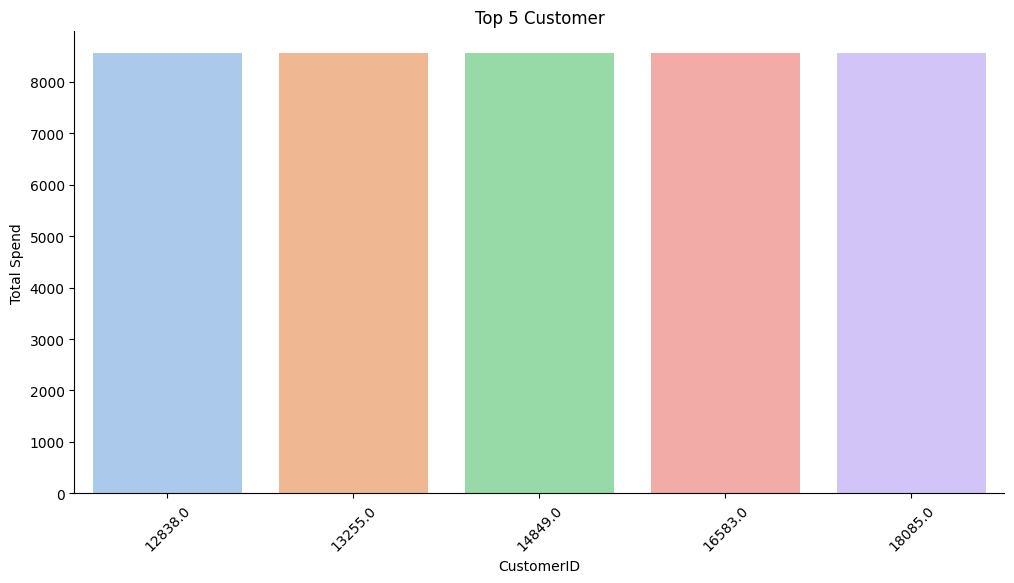

In [31]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create the bar chart, grouping by 'TransactionMonth' and 'Gender'
sns.barplot(data=customer, x=customer['CustomerID'].head(), y=customer['Total_Spend'].head(), palette='pastel')

# Customize the plot
plt.title('Top 5 Customer')
plt.xlabel('CustomerID')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

2. Negara Bagian mana yang memiliki kontribusi pembelian tertinggi?

In [32]:
customer_location = pd.DataFrame(customer.groupby('Location')['Total_Spend'].sum().reset_index())\
                    .sort_values(by=['Total_Spend'],ascending=False)

customer_location

,Location,Total_Spend
1,Chicago,4875940.91
0,California,4656088.61
3,New York,3198908.14
2,New Jersey,1398857.00
4,Washington DC,895632.40


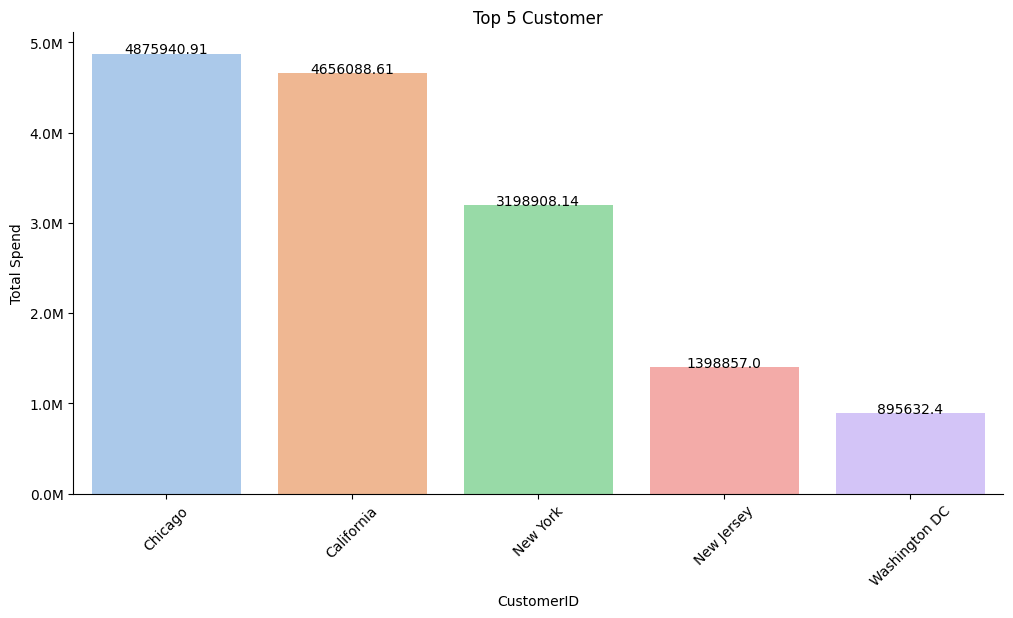

In [33]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create the bar chart, grouping by 'TransactionMonth' and 'Gender'
sns.barplot(data=customer_location, x=customer_location['Location'], y=customer_location['Total_Spend'], palette='pastel')

# Customize the plot
plt.title('Top 5 Customer')
plt.xlabel('CustomerID')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1e6)))

for i, v in enumerate(customer_location['Total_Spend']):
    plt.text(i, v + 2, str(v), ha='center')
# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

In [34]:
customer_location_segment = pd.DataFrame(customer.groupby(['Location','Segment'])['Total_Spend'].sum()).reset_index()

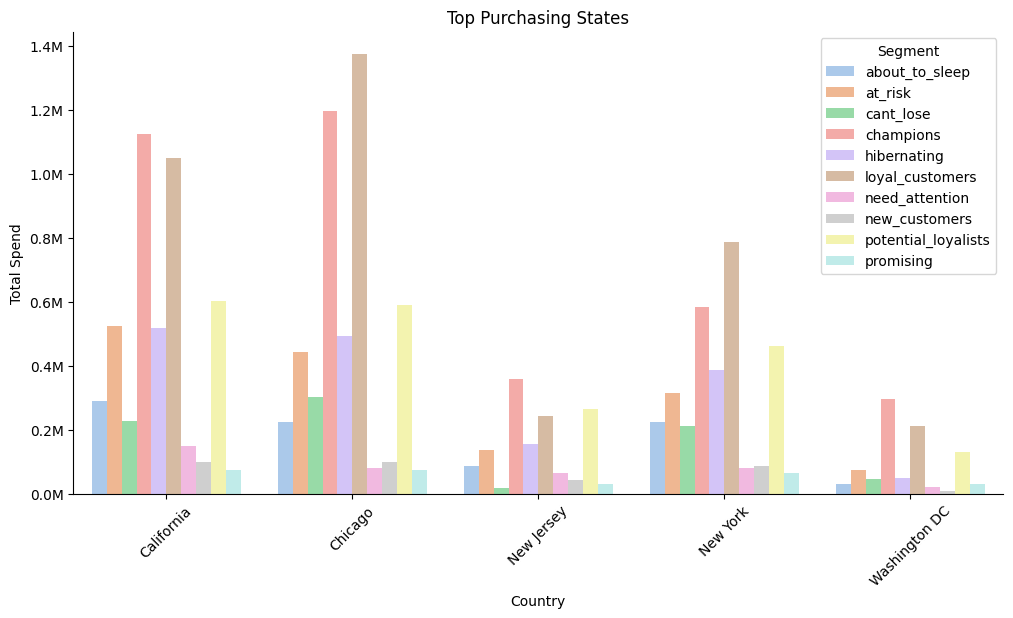

In [35]:
# Set figure size
plt.figure(figsize=(12, 6))

sns.barplot(data=customer_location_segment, x='Location', y='Total_Spend',
            hue='Segment',palette='pastel')

# Customize the plot
plt.title('Top Purchasing States')
plt.xlabel('Country')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1e6)))

# for i, v in enumerate(customer_location_segment['Total_Spend']):
#     plt.text(i, v + 2, str(v), ha='center')
# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

## **Location**

Text(0, 0.5, 'Transaction count')

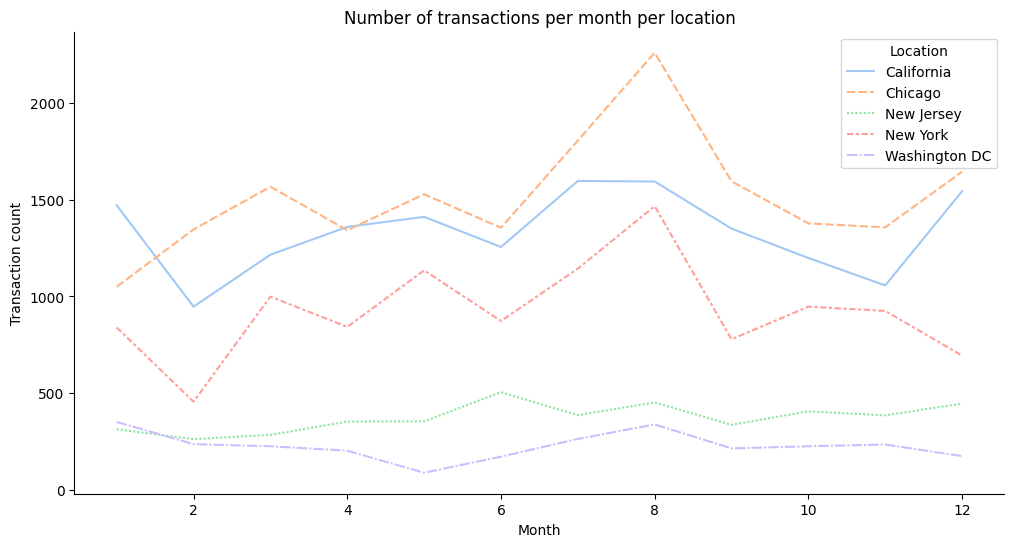

In [36]:
plt.figure(figsize=(12,6))
monthly_counts = merged_df.groupby(['Month', 'Location']).size().unstack(fill_value=0)
sns.lineplot(monthly_counts, palette='pastel')
sns.despine()
plt.title('Number of transactions per month per location')
plt.ylabel('Transaction count')

 3. Kapan transaksi paling banyak terjadi, dan apa pola temporalnya?

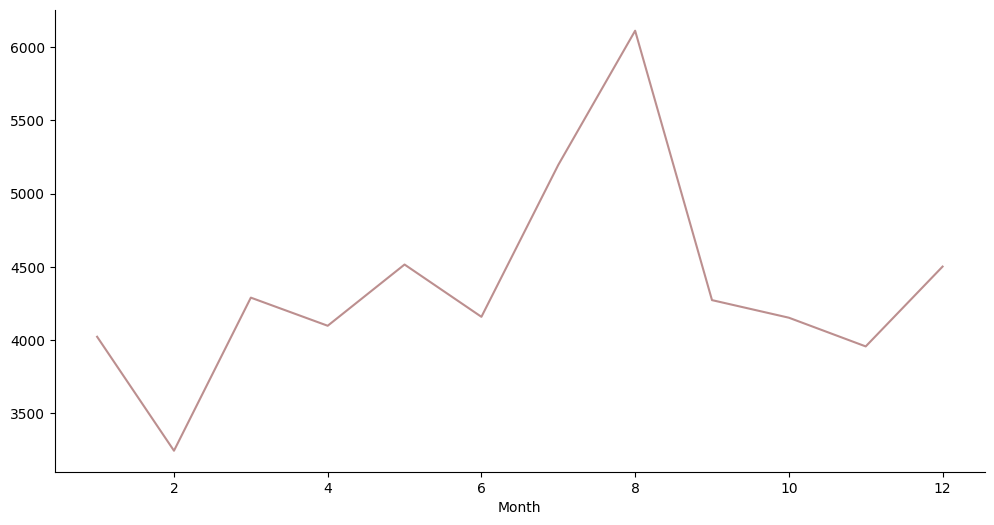

In [37]:
monthly_counts = df['Month'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, color='rosybrown')
sns.despine()

In [38]:
monthly_segment = merged_df[['CustomerID','Month','Total_Spend','Segment']]
monthly_segment.drop_duplicates(inplace=True)
monthly_segment.reset_index(drop=True,inplace=True)

In [39]:
monthly_segment.head()

,CustomerID,Month,Total_Spend,Segment
0,17850.0,1,6924.5,cant_lose
1,13047.0,1,6924.5,champions
2,12583.0,1,6924.5,loyal_customers
3,15100.0,1,6924.5,about_to_sleep
4,14688.0,1,6924.5,champions


In [40]:
monthly_segment_spend = pd.DataFrame(monthly_segment.groupby(['Month','Segment'])['Total_Spend'].sum()).reset_index()
monthly_segment_spend

,Month,Segment,Total_Spend
0,1,about_to_sleep,27273.53
1,1,at_risk,186831.69
2,1,cant_lose,185383.93
3,1,champions,236553.64
4,1,hibernating,350010.67
...,...,...,...
86,11,potential_loyalists,409314.49
87,11,promising,49624.58
88,12,champions,913854.11
89,12,new_customers,275174.13


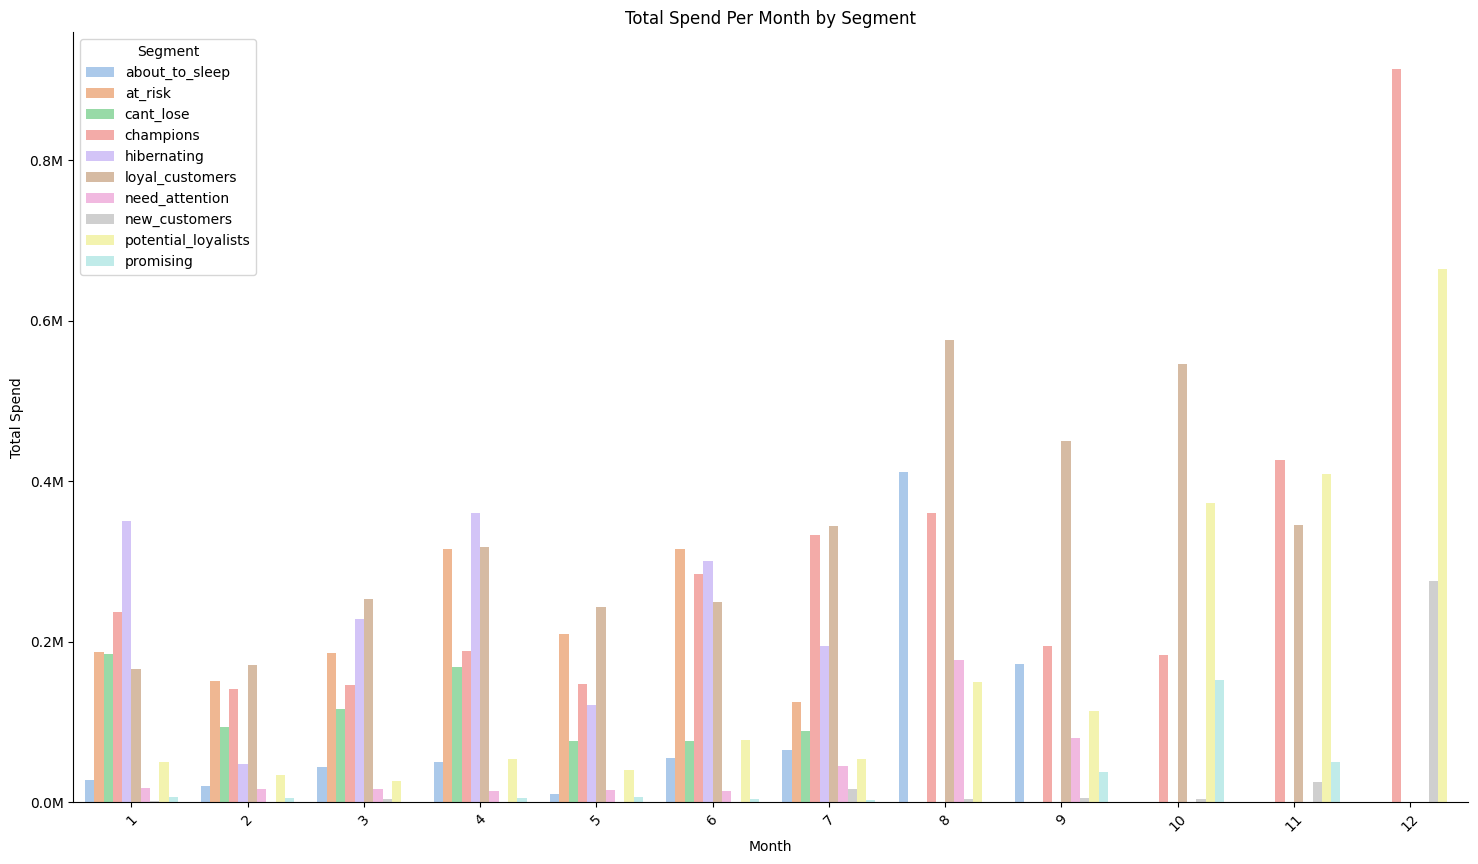

In [41]:
# Set figure size
plt.figure(figsize=(18, 10))

sns.barplot(data=monthly_segment_spend, x='Month', y='Total_Spend',
            hue='Segment',palette='pastel')

# Customize the plot
plt.title('Total Spend Per Month by Segment')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1e6)))

# for i, v in enumerate(customer_location_segment['Total_Spend']):
#     plt.text(i, v + 2, str(v), ha='center')
# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

In [42]:
monthly_category = pd.DataFrame(merged_df.groupby(['Month','Product_Category'])['Transaction_ID'].count()).reset_index()
monthly_category

,Month,Product_Category,Transaction_ID
0,1,Accessories,1
1,1,Android,4
2,1,Apparel,960
3,1,Bags,155
4,1,Bottles,16
...,...,...,...
168,12,Nest-Canada,26
169,12,Nest-USA,1534
170,12,Notebooks & Journals,9
171,12,Office,385


Text(0, 0.5, 'Transaction count')

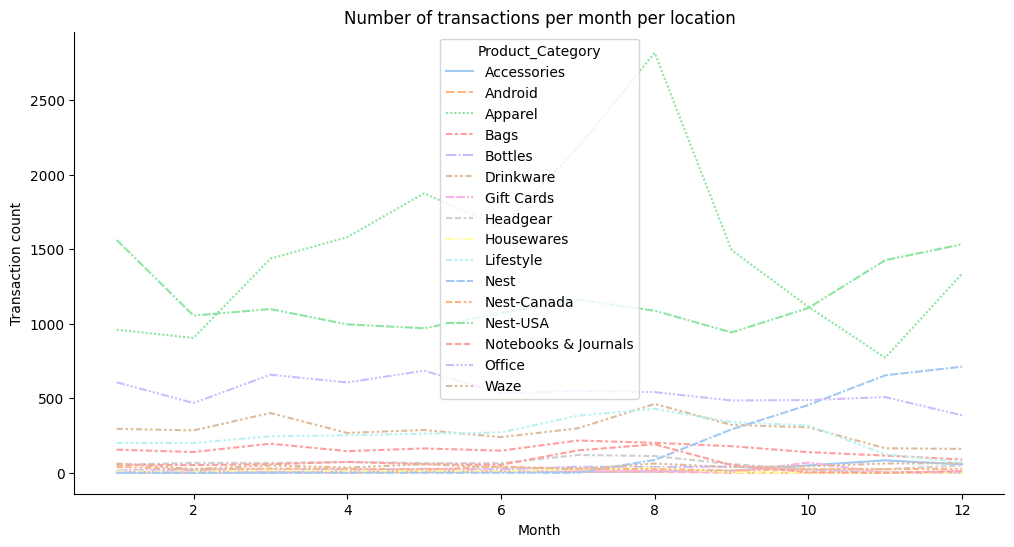

In [43]:
plt.figure(figsize=(12,6))
monthly_cat = merged_df.groupby(['Month', 'Product_Category']).size().unstack(fill_value=0)
sns.lineplot(monthly_cat, palette='pastel')
sns.despine()
plt.title('Number of transactions per month per location')
plt.ylabel('Transaction count')